In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
train_path = r"/kaggle/input/bert-classification-ioai/train.tsv"
test_path = r"/kaggle/input/bert-classification-ioai/test.tsv"
res_dataset_dir = r"corpus_normalized/"
if not os.path.exists(res_dataset_dir):
    os.makedirs(res_dataset_dir)

In [3]:
train_df = pd.read_csv(train_path, sep=",", encoding="utf-8")
test_df = pd.read_csv(test_path, sep=",", encoding="utf-8")
train_df, dev_df, _, _ = \
    train_test_split(train_df, train_df, test_size=0.2, random_state=42)

train_positive_class_df = train_df[train_df['class'] == 1]
train_negative_class_df = train_df[train_df['class'] == 0]
num_positive_examples = train_positive_class_df.shape[0]
# For training set, we take the same amount of positive and negative examples
train_negative_class_df = train_negative_class_df.sample(num_positive_examples, )
# Concatenating positive and negative examples and shuffling the training set
class_normalized_train_df = pd.concat([train_positive_class_df, train_negative_class_df]).sample(frac=1)


out_train_path = os.path.join(res_dataset_dir, "train.tsv")
out_test_path = os.path.join(res_dataset_dir, "test.tsv")
out_dev_path = os.path.join(res_dataset_dir, "dev.tsv")

# class_normalized_train_df.to_csv(out_train_path, sep="\t", encoding="utf-8", index=False, )
train_df.to_csv(out_train_path, sep="\t", encoding="utf-8", index=False,)
test_df.to_csv(out_test_path, sep="\t", encoding="utf-8", index=False)
dev_df.to_csv(out_dev_path, sep="\t", encoding="utf-8", index=False, )

print(train_df.shape)
print(dev_df.shape)

(7612, 3)
(1903, 3)


In [4]:
import re
def list_replace(search, replacement, text):
    """
    Replaces all symbols of text which are present
    in the search string with the replacement string.
    """
    search = [el for el in search if el in text]
    for c in search:
        text = text.replace(c, replacement)
    return text

def clean_text(text):

    text = list_replace \
        ('\u00AB\u00BB\u2039\u203A\u201E\u201A\u201C\u201F\u2018\u201B\u201D\u2019', '\u0022', text)

    text = list_replace \
        ('\u2012\u2013\u2014\u2015\u203E\u0305\u00AF', '\u2003\u002D\u002D\u2003', text)

    text = list_replace('\u2010\u2011', '\u002D', text)

    text = list_replace \
            (
            '\u2000\u2001\u2002\u2004\u2005\u2006\u2007\u2008\u2009\u200A\u200B\u202F\u205F\u2060\u3000',
            '\u2002', text)

    text = re.sub('\u2003\u2003', '\u2003', text)
    text = re.sub('\t\t', '\t', text)

    text = list_replace \
            (
            '\u02CC\u0307\u0323\u2022\u2023\u2043\u204C\u204D\u2219\u25E6\u00B7\u00D7\u22C5\u2219\u2062',
            '.', text)

    text = list_replace('\u2217', '\u002A', text)

    text = list_replace('…', '...', text)

    text = list_replace('\u00C4', 'A', text)
    text = list_replace('\u00E4', 'a', text)
    text = list_replace('\u00CB', 'E', text)
    text = list_replace('\u00EB', 'e', text)
    text = list_replace('\u1E26', 'H', text)
    text = list_replace('\u1E27', 'h', text)
    text = list_replace('\u00CF', 'I', text)
    text = list_replace('\u00EF', 'i', text)
    text = list_replace('\u00D6', 'O', text)
    text = list_replace('\u00F6', 'o', text)
    text = list_replace('\u00DC', 'U', text)
    text = list_replace('\u00FC', 'u', text)
    text = list_replace('\u0178', 'Y', text)
    text = list_replace('\u00FF', 'y', text)
    text = list_replace('\u00DF', 's', text)
    text = list_replace('\u1E9E', 'S', text)
    # Removing punctuation
    text = list_replace(',.[]{}()=+-−*&^%$#@!~;:§/\|\?"\n', ' ', text)
    # Replacing all numbers with masks
    text = list_replace('0123456789', 'x', text)

    currencies = list \
            (
            '\u20BD\u0024\u00A3\u20A4\u20AC\u20AA\u2133\u20BE\u00A2\u058F\u0BF9\u20BC\u20A1\u20A0\u20B4\u20A7\u20B0\u20BF\u20A3\u060B\u0E3F\u20A9\u20B4\u20B2\u0192\u20AB\u00A5\u20AD\u20A1\u20BA\u20A6\u20B1\uFDFC\u17DB\u20B9\u20A8\u20B5\u09F3\u20B8\u20AE\u0192'
        )

    alphabet = list \
            (
            '\t\r абвгдеёзжийклмнопрстуфхцчшщьыъэюяАБВГДЕЁЗЖИЙКЛМНОПРСТУФХЦЧШЩЬЫЪЭЮЯabcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ ')

    allowed = set(currencies + alphabet)

    cleaned_text = [sym for sym in text if sym in allowed]
    cleaned_text = ''.join(cleaned_text)

    return cleaned_text

In [5]:
train_path = r"corpus_normalized/train.tsv"
dev_path = r"corpus_normalized/dev.tsv"
test_path = r"corpus_normalized/test.tsv"

# Loading data
train_df = pd.read_csv(train_path, sep='\t', encoding="utf-8",)
dev_df = pd.read_csv(dev_path, sep='\t', encoding="utf-8",)
test_df = pd.read_csv(test_path, sep='\t', encoding="utf-8",)

# Extracting tweet texts
train_tweet_texts = train_df.tweet.values
test_tweet_texts = test_df.tweet.values
dev_tweet_texts = dev_df.tweet.values

# Preprocessing training tweets
cleaned_train_texts = []
for tweet_text in train_tweet_texts:
    cleaned_text = clean_text(tweet_text).lower()
    split_cleaned_text = cleaned_text.split()
    cleaned_train_texts.append(" ".join(split_cleaned_text))

# Preprocessing test tweets
cleaned_test_texts = []
for tweet_text in test_tweet_texts:
    cleaned_text = clean_text(tweet_text)
    cleaned_test_texts.append(" ".join(cleaned_text.split()))

# Preprocessing validation tweets
cleaned_dev_texts = []
for tweet_text in dev_tweet_texts:
    cleaned_text = clean_text(tweet_text)
    cleaned_dev_texts.append(" ".join(cleaned_text.split()))

train_df["clean_text"] = cleaned_train_texts
dev_df["clean_text"] = cleaned_dev_texts
test_df["clean_text"] = cleaned_test_texts

In [6]:
import torch.nn as nn
from transformers import AutoTokenizer, AutoModel, AdamW, get_linear_schedule_with_warmup
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [7]:
PRE_TRAINED_MODEL_NAME = 'ai-forever/ruBert-base'
BATCH_SIZE = 64
EPOCHS = 2
LEARNING_RATE=2e-5
NUM_WARMUP_STEPS=0

In [8]:
class TwitterClassifier(nn.Module):
  def __init__(self, n_classes):
    super(TwitterClassifier, self).__init__()
    self.bert = AutoModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

  def forward(self, input_ids, attention_mask):
    outputs = self.bert(input_ids=input_ids,
                         attention_mask=attention_mask)
    # last_hidden_state_cls = outputs[0][:, 0, :]
    last_hidden_state_cls = outputs['pooler_output']
    output = self.drop(last_hidden_state_cls)
    return self.out(output)

In [9]:
tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
train_tokenized = [tokenizer.encode(x, add_special_tokens=True) for x in cleaned_train_texts]
dev_tokenized = [tokenizer.encode(x, add_special_tokens=True) for x in cleaned_dev_texts]
test_tokenized = [tokenizer.encode(x, add_special_tokens=True) for x in cleaned_test_texts]

config.json:   0%|          | 0.00/590 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.78M [00:00<?, ?B/s]

In [10]:
# находим самое длинное предложение
train_max_len = 0
for i in train_tokenized:
    if len(i) > train_max_len:
        train_max_len = len(i)

dev_max_len = 0
for i in dev_tokenized:
    if len(i) > dev_max_len:
        dev_max_len = len(i)

test_max_len = 0
for i in test_tokenized:
    if len(i) > test_max_len:
        test_max_len = len(i)

print(train_max_len)
print(dev_max_len)
print(test_max_len)


126
83
102


In [11]:
class TwitterDataset(Dataset):
  def __init__(self, ids, tweets, targets, tokenizer, max_len):
    self.ids = ids
    self.tweets = tweets
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.tweets)

  def __getitem__(self, item):
    tweet = str(self.tweets[item])
    target = self.targets[item]
    id = self.ids[item]
    encoding = self.tokenizer.encode_plus(
      tweet,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
      truncation=True,
    )
    return {
      'id': id,
      'tweet_text': tweet,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [12]:
def create_data_loader(df, tokenizer, batch_size, max_len):
  if "label" in df:
    labels = df.label.to_numpy()
  else:
    labels = [0] * len(df)
  ds = TwitterDataset(
    ids = df.id,
    tweets=df.clean_text,
    targets=labels,
    tokenizer=tokenizer,
    max_len=max_len
  )
  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4,
  )

In [13]:
print(test_df.columns)
train_df = train_df.rename(columns={'class': 'label'})
dev_df = dev_df.rename(columns={'class': 'label'})
print(train_df.shape)
print(dev_df.shape)
print(test_df.shape)


tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
train_data_loader = create_data_loader(train_df, tokenizer, BATCH_SIZE, train_max_len)
dev_data_loader = create_data_loader(dev_df, tokenizer, BATCH_SIZE, dev_max_len)
test_data_loader = create_data_loader(test_df, tokenizer, BATCH_SIZE, test_max_len)

Index(['id', 'tweet', 'clean_text'], dtype='object')
(7612, 4)
(1903, 4)
(1504, 3)


In [14]:
import torch

In [15]:
n_classes = 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TwitterClassifier(n_classes)
model = model.to(device)

pytorch_model.bin:   0%|          | 0.00/716M [00:00<?, ?B/s]

In [16]:
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=NUM_WARMUP_STEPS,
  num_training_steps=total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [17]:
from tqdm import tqdm

def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
  model = model.train()
  losses = []
  correct_predictions = 0
  for d in tqdm(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
  return correct_predictions.double() / n_examples, np.mean(losses)

In [18]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(input_ids=input_ids,
        attention_mask=attention_mask)
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, targets)
      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())
  return correct_predictions.double() / n_examples, np.mean(losses)

In [19]:
import torch
from collections import defaultdict

# Initialize a dictionary to store training and validation history
history = defaultdict(list)

# Best validation loss (initialize with a large number)
best_val_loss = float('inf')
best_model_wts = None

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)
    
    # Train the model for this epoch
    train_acc, train_loss = train_epoch(model, train_data_loader, loss_fn, optimizer, device, scheduler, len(train_df))
    print(f'Train loss {train_loss} accuracy {train_acc}')
    
    # Evaluate the model on the validation set
    val_acc, val_loss = eval_model(model, dev_data_loader, loss_fn, device, len(dev_df))
    print(f'Val   loss {val_loss} accuracy {val_acc}')
    print()
    
    # Save the best model if the validation loss improves
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_wts = model.state_dict()  # Save model weights
    
    # Store the results in history
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

# After training, load the best model weights
model.load_state_dict(best_model_wts)

Epoch 1/2
----------


  0%|          | 0/119 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2673: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2673: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_leng

Train loss 0.24677764993755757 accuracy 0.9122438255386232



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2673: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2673: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input

Val   loss 0.20779581144452094 accuracy 0.9201261166579086

Epoch 2/2
----------


  0%|          | 0/119 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2673: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2673: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_leng

Train loss 0.139005460298988 accuracy 0.9446925906463478



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2673: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2673: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input

Val   loss 0.2170908788839976 accuracy 0.9159222280609564



<All keys matched successfully>

In [20]:
history['train_acc'] = [train_acc.cpu() for train_acc in history['train_acc']]
history['val_acc'] = [val_acc.cpu() for val_acc in history['val_acc']]

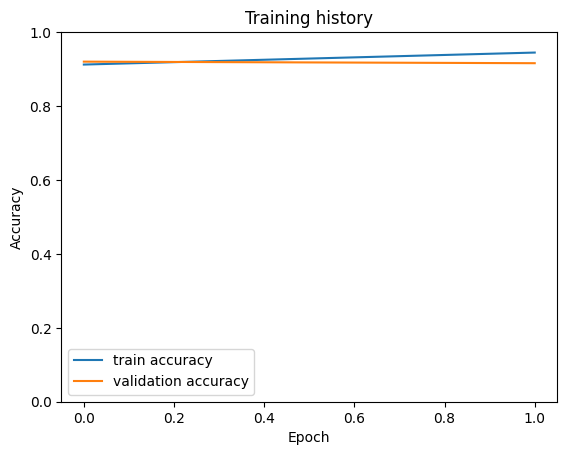

In [21]:
import matplotlib.pyplot as plt

plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [22]:
import torch.nn.functional as F

def get_predictions(model, data_loader):
  model = model.eval()
  tweet_ids = []
  predictions = []
  prediction_probs = []
  real_values = []
  with torch.no_grad():
    for d in data_loader:
      ids = d["id"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      outputs = F.softmax(model(
        input_ids=input_ids,
        attention_mask=attention_mask
      ))
      _, preds = torch.max(outputs, dim=1)
      tweet_ids.extend(ids)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  return tweet_ids, predictions, prediction_probs

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

tweet_ids, predicted_dev_labels, prediction_probs = get_predictions(model,dev_data_loader)
dev_labels = dev_df.label
dev_precision = precision_score(dev_labels, predicted_dev_labels)
dev_recall = recall_score(dev_labels, predicted_dev_labels)
dev_f_measure = f1_score(dev_labels, predicted_dev_labels)
dev_roc_auc = roc_auc_score(dev_labels, predicted_dev_labels)
print(f"Dev:\nPrecision: {dev_precision}\n"
        f"Recall: {dev_recall}\n"
        f"F-measure: {dev_f_measure}\n"
        f"ROC_AUC: {dev_roc_auc}")
print(classification_report(dev_labels, predicted_dev_labels))

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2673: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2673: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

Dev:
Precision: 0.5423728813559322
Recall: 0.3764705882352941
F-measure: 0.4444444444444444
ROC_AUC: 0.6726553749024133
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1733
           1       0.54      0.38      0.44       170

    accuracy                           0.92      1903
   macro avg       0.74      0.67      0.70      1903
weighted avg       0.91      0.92      0.91      1903



In [24]:
tweet_ids, predicted_test_labels, prediction_probs = get_predictions(model, test_data_loader)

df_submit = pd.DataFrame(columns=["id", "class"])
df_submit["id"] = test_df['id'].values
df_submit["class"] = [x.item() for x in predicted_test_labels]
df_submit.to_csv("submission.csv", sep=",", index=False)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2673: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2673: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 